# **1. Exploración y Preparación de los Datos**

***VISTA GENERAL DEL DATASET***

In [75]:
!pip install python-dotenv -q

In [76]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from dotenv import load_dotenv



**Cargar dataset**

In [77]:
# Cargar los datos
load_dotenv()
data = os.getenv('file')

df = pd.read_csv(data)
df.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


In [78]:
df.shape

(1000, 12)

In [79]:
df.columns

Index(['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside', 'custcat'],
      dtype='object')

**Glosario de las variables**

* region - Región geográfica del cliente
* tenure - Tiempo que lleva el cliente con la empresa (antigüedad en meses)
* age - Edad del cliente medida en años
* marital - Estado civil (típicamente 1=Casado, 0=Soltero)
* address - Años en la dirección actual
* income - Ingresos del cliente medido en miles de unidades monetarias anuales (miles/año)
* ed - Nivel educativo
* employ - Años de empleo
* retire - Estado de jubilación  (0=No jubilado, 1=Jubilado)
*gender - Género  (típicamente 0=Femenino, 1=Masculino)
* reside - Número de residentes en el hogar
* custcat - Categoría del cliente (1-4, siendo los diferentes segmentos)

# **2. Análisis Exploratorio de Datos (EDA)**

In [80]:
# Obtener la dimensión del dataframe
dimension = df.shape
print("Dimensión del dataframe:", dimension)

# Obtener el tipo de datos de cada columna
tipos_de_datos = df.dtypes
print("Tipos de datos del dataframe:")
print(tipos_de_datos)

Dimensión del dataframe: (1000, 12)
Tipos de datos del dataframe:
region       int64
tenure       int64
age          int64
marital      int64
address      int64
income     float64
ed           int64
employ       int64
retire     float64
gender       int64
reside       int64
custcat      int64
dtype: object


**Buscar valores faltantes, nulos y duplicados**

In [81]:
null=(lambda df: df.isnull().sum())(df)
duplicated = (lambda df: df.duplicated().sum())(df)
unique_val = df.nunique()
print(f"Valores nulos:\n{null}\n")
print(f"Valores duplicados:\n{duplicated}\n")
print(f"Valores unicos:\n{unique_val}\n")

Valores nulos:
region     0
tenure     0
age        0
marital    0
address    0
income     0
ed         0
employ     0
retire     0
gender     0
reside     0
custcat    0
dtype: int64

Valores duplicados:
0

Valores unicos:
region       3
tenure      72
age         60
marital      2
address     50
income     218
ed           5
employ      46
retire       2
gender       2
reside       8
custcat      4
dtype: int64



**Anàlisis Descriptivo**

In [82]:
df['custcat'].value_counts()

,count
custcat,
3,281
1,266
4,236
2,217


1.Basic Service.

2.E-Service.

3.Plus Service.

4.Total Service.

In [83]:
df.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


In [84]:
# Estadísticas descriptivas para las variables predictoras
predictor_stats = df.drop(columns=['custcat']).describe()
print(predictor_stats)

          region       tenure          age      marital      address  \
count  1000.0000  1000.000000  1000.000000  1000.000000  1000.000000   
mean      2.0220    35.526000    41.684000     0.495000    11.551000   
std       0.8162    21.359812    12.558816     0.500225    10.086681   
min       1.0000     1.000000    18.000000     0.000000     0.000000   
25%       1.0000    17.000000    32.000000     0.000000     3.000000   
50%       2.0000    34.000000    40.000000     0.000000     9.000000   
75%       3.0000    54.000000    51.000000     1.000000    18.000000   
max       3.0000    72.000000    77.000000     1.000000    55.000000   

            income           ed       employ       retire       gender  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000   
mean     77.535000     2.671000    10.987000     0.047000     0.517000   
std     107.044165     1.222397    10.082087     0.211745     0.499961   
min       9.000000     1.000000     0.000000     0.0000

# ***region:***
Representa una variable  que indica regiones (valores entre 1 y 3).

**Media (2.022)**: La región promedio está cerca de la categoría 2.

**Desviación estándar (0.8162)**: Hay una dispersión moderada.

**Rango:** Va desde 1 (mínimo) hasta 3 (máximo).

# ***tenure:***
Indica el tiempo (en meses) que alguien ha estado asociado a un  periodo de permanencia

**Media (35.53):** Los participantes tienen, en promedio, 35 períodos de "tenure".

**Máximo (72) y mínimo (1)**: Indican el rango completo de duración.

# ***age:***
Representa la edad de las personas.

**Media (41.68 años):** La mayoría de los individuos tienen entre 40 y 42 años.

**Rango (18-77):** Desde 18 años (mínimo) hasta 77 años (máximo).

# ***marital:***

Variable binaria que indica el estado civil (0 = soltero, 1 = casado).

**Media (0.495):** Aproximadamente la mitad están casados.

**Distribución:** Mediana de 0 y un rango entre 0 y 1.

# ***address:***

Indica el tiempo (en años) viviendo en su dirección actual.

**Media (11.55):** En promedio, los participantes llevan 11.55 períodos viviendo en su dirección actual.

**Rango (0-55):** Desde recién llegados hasta residentes de 55 años.

# ***income:***

Ingresos del cliente medido en miles de unidades monetarias anuales (miles/año)

**Media (77.54):** Los ingresos promedio son 77 (probablemente en miles de dólares u otra unidad).

**Desviación estándar (107.04):** Hay una gran variabilidad, y algunos valores son extremadamente altos (máximo de 1668).

# ***ed (educación):***

Representa niveles de educación (en una escala ordinal de 1 a 5).

**Media (2.67):** La mayoría tiene niveles intermedios de educación.

**Rango (1-5):** Desde el nivel más bajo hasta el más alto.

1.sin estudios

2.estudios bàsicos

3.educaciòn secundaria/bachillerato

4.Educaciòn superior

5.Posgrados

# ***employ:***

Indica los años de empleo o experiencia laboral.

**Media (10.99):** En promedio, los participantes tienen 11 períodos de empleo.

**Máximo (47):** Algunos tienen una experiencia extensa.

# ***retire:***

Variable binaria (0 = no retirado, 1 = retirado).

**Media (0.047):** Muy pocas personas están retiradas (alrededor del 4.7%).

**Máximo (1):** Indica que hay algunos individuos retirados.

#***gender:***

Variable binaria para género (1 = masculino, 0 = femenino).

**Media (0.517):** Aproximadamente hay una proporción equilibrada de géneros.

# ***reside:***

Representa el número de residentes por hogar.

**Media (2.33):** el promedio de residentes es de 2-3.

**Máximo (8):** Algunos hogares tienen hasta 8 personas viviendo en el mismo lugar.


#***Cuscat:***
1.Basic Service.

2.E-Service.

3.Plus Service.

4.Total Service.

**Gràfico Region vs Antiguedad**

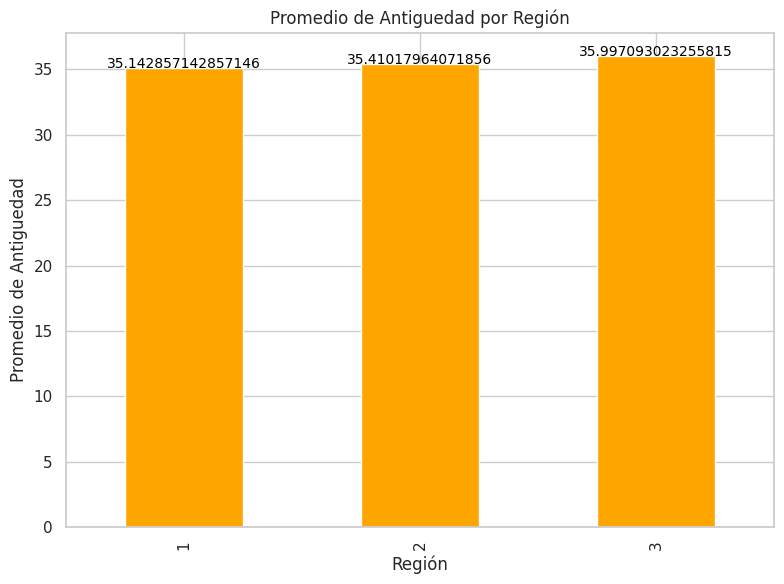

In [85]:
# Agrupar por 'region' y calcular el promedio de 'tenure'
region_tenure = df.groupby('region')['tenure'].mean()

# Crear gráfico de barras
fig, ax = plt.subplots(figsize=(8, 6))
region_tenure.plot(kind='bar', color='orange', ax=ax)

# Títulos y etiquetas
ax.set_title('Promedio de Antiguedad por Región', fontsize=12)
ax.set_xlabel('Región', fontsize=12)
ax.set_ylabel('Promedio de Antiguedad', fontsize=12)

# Mostrar gráfico
plt.tight_layout()
# Añadir etiquetas con los valores sobre cada barra
for bar in ax.patches:
    # Obtener la altura de cada barra
    value = bar.get_height()
    # Añadir texto sobre la barra
    ax.text(bar.get_x() + bar.get_width() / 2, value, str(value),
            ha='center', fontsize=10, color='black')
plt.show()

Al comparar los promedios de tenure entre las tres regiones, se puede observar que la región 3 tiene el valor más alto de antiguedad en meses, seguida de la región 2 y luego la región 1. Esto sugiere que los clientes de la región 3 tienen, en promedio, una mayor antigüedad o tiempo como clientes de la empresa.

**Gràfico de Tenure vs Age**

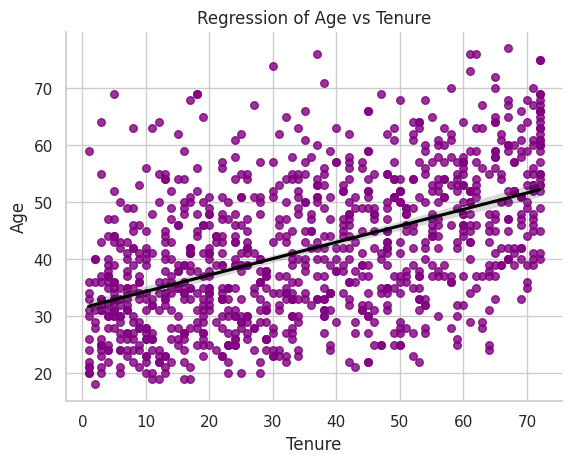

In [86]:
sns.regplot(x='tenure', y='age', data=df, scatter_kws={'color': 'purple', 's': 30}, line_kws={'color': 'black'})
plt.gca().spines[['top', 'right']].set_visible(False)
plt.title('Regression of Age vs Tenure')
plt.xlabel('Tenure')
plt.ylabel('Age')
plt.show()

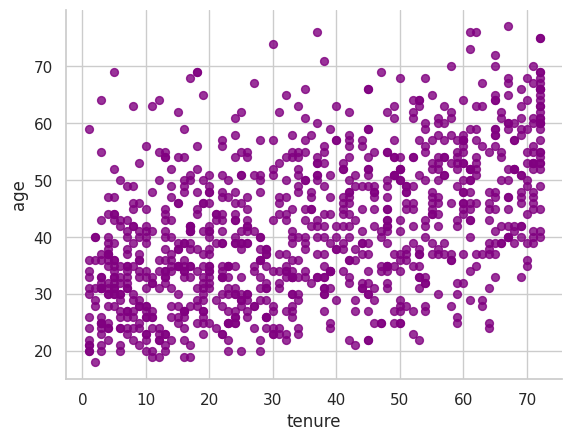

In [87]:
df.plot(kind='scatter', x='tenure', y='age',color = 'purple', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

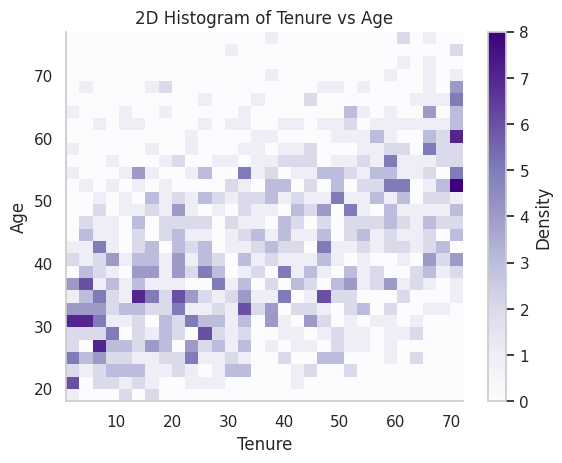

In [88]:
plt.hist2d(df['tenure'], df['age'], bins=(30, 30), cmap='Purples')
plt.colorbar(label='Density')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.title('2D Histogram of Tenure vs Age')
plt.xlabel('Tenure')
plt.ylabel('Age')
plt.show()

Estos gráficos de dispersión muestra la relación entre la "Antiguedad/tenure"  y "Edad/age".
Hay una gran dispersión de puntos, lo que sugiere una relación compleja entre estas variables.
Aún así, parece haber una tendencia general ascendente, indicando que a mayor tenure o antiguedad,  hay mayores valores en la edad.
Hay algunos puntos outliers que se desvían significativamente de la tendencia general, lo cual puede deberse a factores adicionales que influyen en la métrica.

**Gràfico de Edad vs Estado civil**

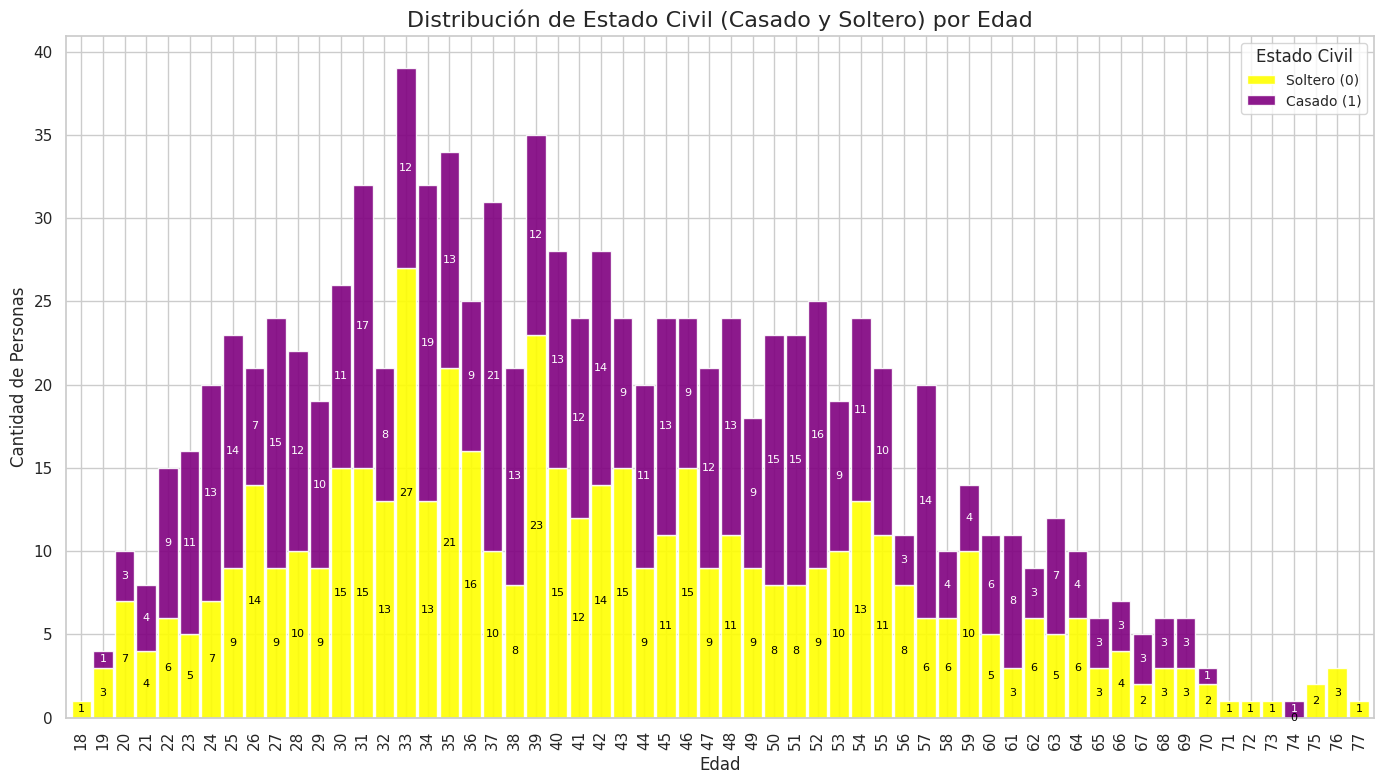

In [89]:
# Agrupar los datos por edad y contar los valores de marital
age_marital_counts = df.groupby('age')['marital'].value_counts(normalize=False).unstack(fill_value=0)

# Configuración del gráfico
fig, ax = plt.subplots(figsize=(14, 8))

# Gráfico de barras para "Single" (amarillo) y "Married" (morado)
age_marital_counts.plot(kind='bar', stacked=True, color=['yellow', 'purple'], alpha=0.9, ax=ax, width=0.9)

# Agregar etiquetas sobre las barras
for idx, (single, married) in enumerate(zip(age_marital_counts[0], age_marital_counts[1])):
    # Etiquetas para "Single"
    ax.text(idx, single / 2, str(single), ha='center', va='center', fontsize=8, color='black')
    # Etiquetas para "Married"
    if married > 0:  # Evitar superponer valores nulos
        ax.text(idx, single + (married / 2), str(married), ha='center', va='center', fontsize=8, color='white')

# Configuración de etiquetas y título
ax.set_title('Distribución de Estado Civil (Casado y Soltero) por Edad', fontsize=16)
ax.set_xlabel('Edad', fontsize=12)
ax.set_ylabel('Cantidad de Personas', fontsize=12)
ax.legend(title='Estado Civil', labels=['Soltero (0)', 'Casado (1)'], fontsize=10)
plt.xticks(rotation=90)  # Rotar las etiquetas de edad para mejor legibilidad
plt.tight_layout()

# Mostrar el gráfico
plt.show()


La altura total de cada barra muestra la cantidad total de personas en esa edad. os números indican las cantidades específicas de solteros y casados dentro de cada grupo de edad.

**Edad Temprana (18-30 años):**

Predominan los solteros (amarillo), especialmente en edades más jóvenes.
En edades cercanas a los 30 años, comienza a observarse un aumento en la proporción de personas casadas.

**Edad Media (30-50 años):**

La proporción de casados aumenta significativamente en esta etapa.
Las barras son más altas, lo que indica que estas edades concentran la mayor cantidad de personas en el dataset.

**Edad Avanzada (50 años en adelante):**

La cantidad de personas disminuye en general a medida que la edad aumenta.
Se observa una mayor proporción de casados en estas edades.

**Gràfico de Distribución de Edad por Categoría de Cliente**

<ipython-input-90-52ac72abb5c0>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='custcat', y='age', palette=['purple', 'yellow', 'blue', 'orange'], ax=ax)
<ipython-input-90-52ac72abb5c0>:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Basic Service', 'E-Service', 'Plus Service', 'Total Service'])  # Etiquetas de las categorías


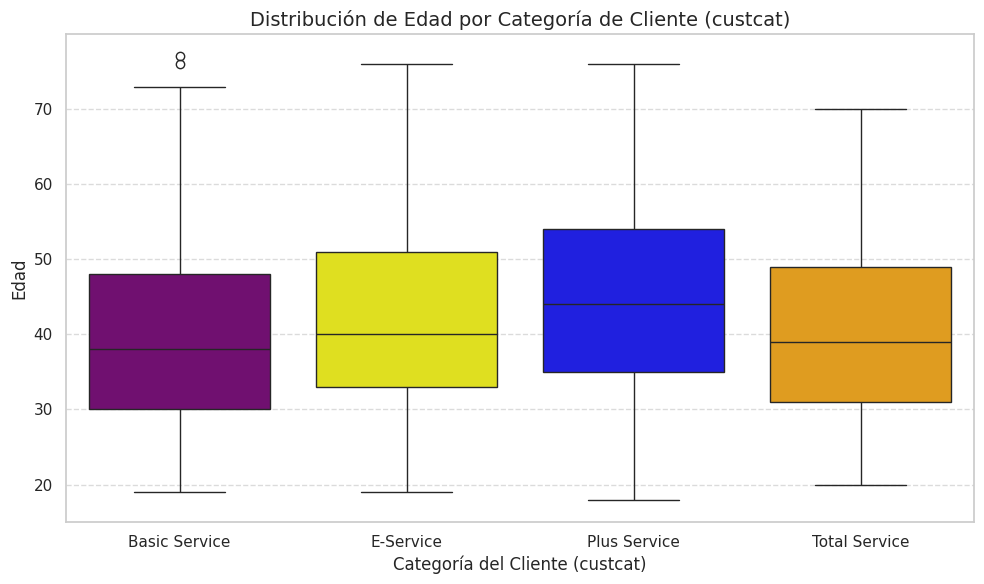

In [90]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.boxplot(data=df, x='custcat', y='age', palette=['purple', 'yellow', 'blue', 'orange'], ax=ax)

# Configuración del gráfico
ax.set_title('Distribución de Edad por Categoría de Cliente (custcat)', fontsize=14)
ax.set_xlabel('Categoría del Cliente (custcat)', fontsize=12)
ax.set_ylabel('Edad', fontsize=12)
ax.set_xticklabels(['Basic Service', 'E-Service', 'Plus Service', 'Total Service'])  # Etiquetas de las categorías
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Mostrar el gráfico
plt.show()


**Plus Service** parece atraer a clientes ligeramente mayores.

**E-Service** tiene a atraer medianamente clientes de mas de 45 años

**Basic Service** y **Total Service** tienen una población de clientes más variada en términos de edad.

El rango completo de edades muestra que todas las categorías tienen una clientela diversa.

**Gràfico de Ingresos y Educación (income-ed**)

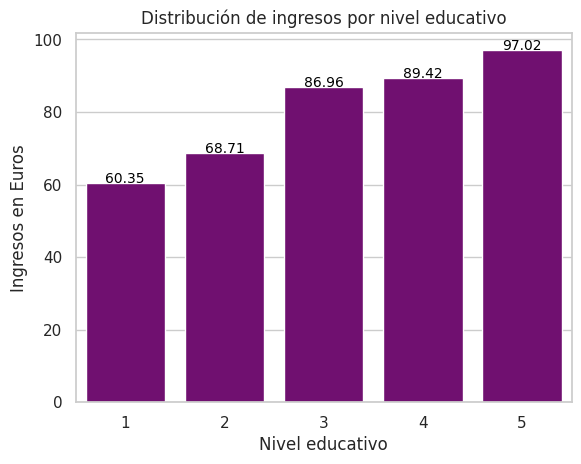

In [91]:
# Configurar el estilo del gráfico
sns.set_theme(style="whitegrid")

# Crear el gráfico de barras
ax = sns.barplot(x="ed", y="income", data=df, errorbar=None, color="purple")

# Título y etiquetas de los ejes
plt.title("Distribución de ingresos por nivel educativo")
plt.xlabel("Nivel educativo")
plt.ylabel("Ingresos en Euros")

# Añadir etiquetas con los valores sobre cada barra
for bar in ax.patches:
    # Obtener la altura de cada barra
    value = bar.get_height()
    # Añadir texto sobre la barra
    ax.text(
        bar.get_x() + bar.get_width() / 2,  # Coordenada X del texto
        value,                              # Coordenada Y del texto
        f"{value:.2f}",                     # Formato del valor
        ha='center', fontsize=10, color='black'
    )

# Mostrar el gráfico
plt.show()

Hay una clara correlación positiva entre nivel educativo e ingresos
El mayor salto en ingresos se da entre el nivel 2 y 3
La diferencia entre el nivel más bajo y el más alto es de aproximadamente  E 36,670.

Los incrementos son más pronunciados en los niveles iniciales y se van suavizando en los niveles superiores

**Gràfico de Años de Empleo y Estado de Jubilación (employ-retire)**

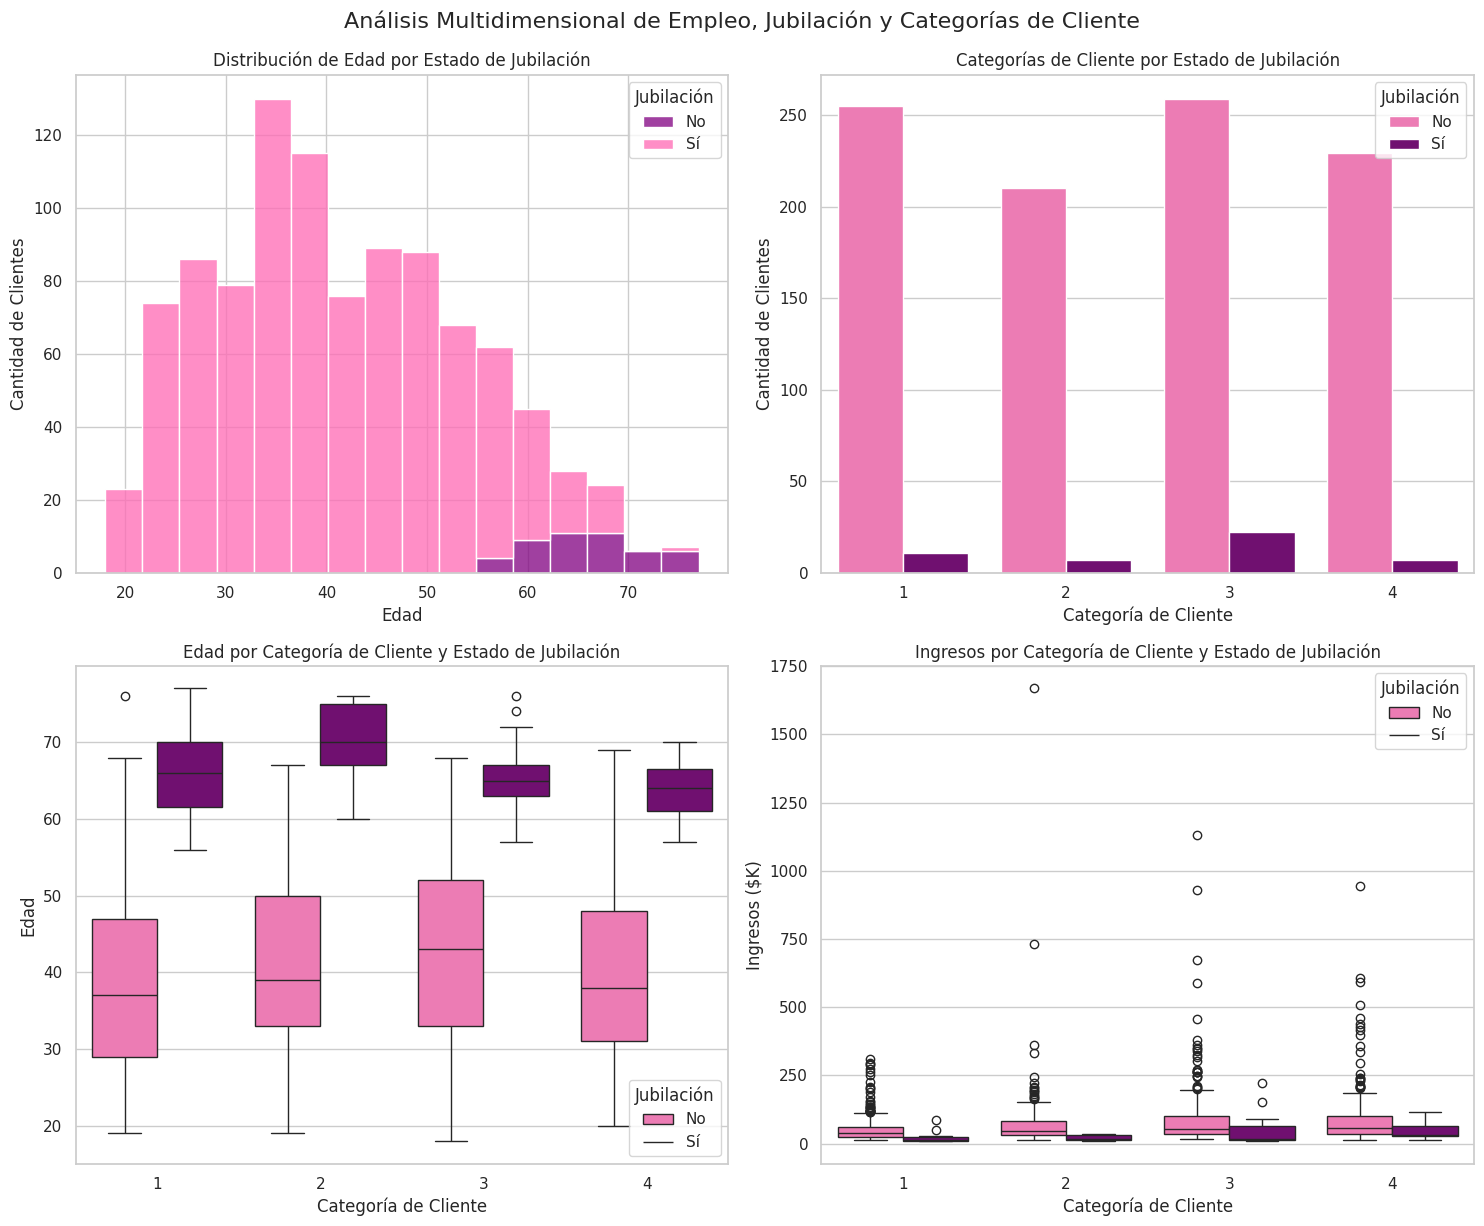


Estadísticas por Estado de Jubilación y Categoría de Cliente:
               employ          age income
                 mean count   mean   mean
retire custcat                           
0.0    1         7.99   255  38.52  56.06
       2        10.00   210  40.85  76.62
       3        13.56   259  42.65  92.79
       4         9.74   229  39.90  93.30
1.0    1        20.00    11  66.00  24.55
       2        28.00     7  70.00  21.14
       3        23.14    22  65.36  44.77
       4        26.14     7  63.71  49.57


In [92]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Configurar el estilo
sns.set_theme(style="whitegrid")

# Definir paleta de colores rosa y morado
colors = ["#FF69B4", "#800080"]  # Rosa y Morado
sns.set_palette(colors)

# Crear una figura con subplots
fig = plt.figure(figsize=(15, 12))

# 1. Distribución de edad por estado de jubilación
plt.subplot(2, 2, 1)
sns.histplot(data=df, x='age', hue='retire', multiple="stack", palette=colors)
plt.title('Distribución de Edad por Estado de Jubilación')
plt.xlabel('Edad')
plt.ylabel('Cantidad de Clientes')
plt.legend(title='Jubilación', labels=['No', 'Sí'])

# 2. Distribución de categorías de cliente por estado de jubilación
plt.subplot(2, 2, 2)
sns.countplot(data=df, x='custcat', hue='retire', palette=colors)
plt.title('Categorías de Cliente por Estado de Jubilación')
plt.xlabel('Categoría de Cliente')
plt.ylabel('Cantidad de Clientes')
plt.legend(title='Jubilación', labels=['No', 'Sí'])

# 3. Distribución de edad por categoría de cliente
plt.subplot(2, 2, 3)
sns.boxplot(data=df, x='custcat', y='age', hue='retire', palette=colors)
plt.title('Edad por Categoría de Cliente y Estado de Jubilación')
plt.xlabel('Categoría de Cliente')
plt.ylabel('Edad')
plt.legend(title='Jubilación', labels=['No', 'Sí'])

# 4. Distribución de ingresos por categoría y jubilación
plt.subplot(2, 2, 4)
sns.boxplot(data=df, x='custcat', y='income', hue='retire', palette=colors)
plt.title('Ingresos por Categoría de Cliente y Estado de Jubilación')
plt.xlabel('Categoría de Cliente')
plt.ylabel('Ingresos ($K)')
plt.legend(title='Jubilación', labels=['No', 'Sí'])

# Ajustar el layout
plt.tight_layout()

# Título general
fig.suptitle('Análisis Multidimensional de Empleo, Jubilación y Categorías de Cliente', fontsize=16, y=1.02)

# Mostrar la figura
plt.show()

# Imprimir estadísticas relevantes
print("\nEstadísticas por Estado de Jubilación y Categoría de Cliente:")
stats = df.groupby(['retire', 'custcat']).agg({
    'employ': ['mean', 'count'],
    'age': 'mean',
    'income': 'mean'
}).round(2)
print(stats)

Con base en los datos disponibles, se pueden identificar características importantes donde la mayoría de **los clientes son personas activas que trabajan y tienen entre 30 y 50 años**. Los jubilados, que suelen superar los 60 años, son una minoría, en cuanto a consumo y preferencias **las categorías 1 y 3 son las que más llaman la atención de los clientes en general**, los trabajadores activos están presentes en casi todas las categorías, pero **los jubilados prefieren claramente la categoría 3**. Esto indica que debemos prestar especial atención a lo que esta categoría ofrece para los jubilados. Los clientes tienen ingresos muy diferentes entre sí, sin importar la categoría. **Donde los jubilados, no siempre ganan menos que los activos.** Hay clientes con ingresos especialmente altos, tanto activos como jubilados. Esto sugiere que es importante no asumir que todos los jubilados tienen ingresos bajos.** La categoria 4** tiene mayor variedad de ingresos. Para **la categoria 2** se puede inferir que predominan clientes activos, tiene la menor proporción de clientes jubilados y muestra patrones de ingreso más estables.


**Grafico Género y Residentes del Hogar (gender-reside)**

<ipython-input-93-f5836e231e4e>:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='reside', y='income', hue='gender', ci=None, palette=gender_palette)


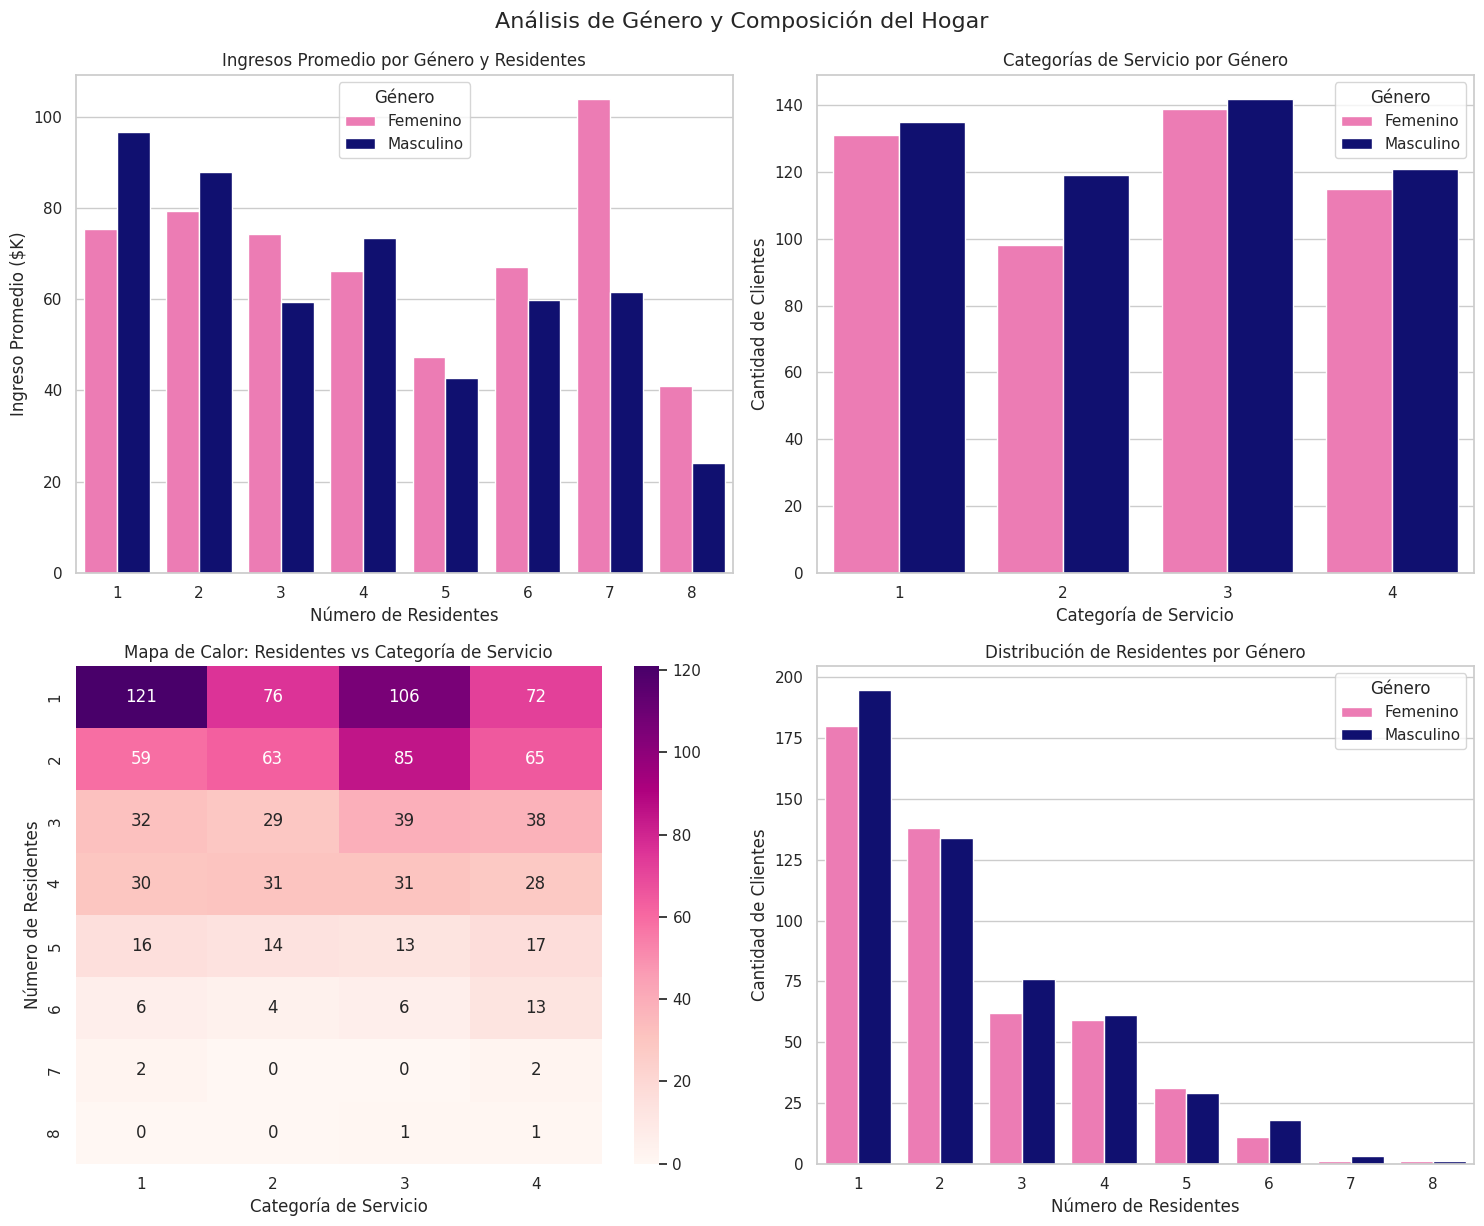


Estadísticas por Género y Residentes:
               income       custcat
                 mean count   count
gender reside                      
0      1        75.41   180     180
       2        79.30   138     138
       3        74.23    62      62
       4        66.27    59      59
       5        47.39    31      31
       6        67.00    11      11
       7       104.00     1       1
       8        41.00     1       1
1      1        96.71   195     195
       2        87.87   134     134
       3        59.47    76      76
       4        73.41    61      61
       5        42.76    29      29
       6        59.78    18      18
       7        61.67     3       3
       8        24.00     1       1

Matriz de Correlaciones:
         gender  reside  income  custcat
gender    1.000   0.017   0.039   -0.005
reside    0.017   1.000  -0.098    0.082
income    0.039  -0.098   1.000    0.135
custcat  -0.005   0.082   0.135    1.000


In [93]:
# Configuración del estilo
sns.set_theme(style="whitegrid")

# Definir paleta de colores específica para género
gender_palette = {0: '#FF69B4',  # Rosa para mujeres
                 1: '#000080'}   # Azul rey para hombres

# Crear figura con subplots
fig = plt.figure(figsize=(15, 12))

# 1. Patrones de consumo por género y tamaño familiar
plt.subplot(2, 2, 1)
sns.barplot(data=df, x='reside', y='income', hue='gender', ci=None, palette=gender_palette)
plt.title('Ingresos Promedio por Género y Residentes')
plt.xlabel('Número de Residentes')
plt.ylabel('Ingreso Promedio ($K)')
plt.legend(title='Género', labels=['Femenino', 'Masculino'])

# 2. Distribución de servicios por género y residentes
plt.subplot(2, 2, 2)
sns.countplot(data=df, x='custcat', hue='gender', palette=gender_palette)
plt.title('Categorías de Servicio por Género')
plt.xlabel('Categoría de Servicio')
plt.ylabel('Cantidad de Clientes')
plt.legend(title='Género', labels=['Femenino', 'Masculino'])

# 3. Mapa de calor de residentes vs servicios
plt.subplot(2, 2, 3)
cross_tab = pd.crosstab(df['reside'], df['custcat'])
sns.heatmap(cross_tab, annot=True, fmt='d', cmap='RdPu')  # Usar RdPu para rosa-morado
plt.title('Mapa de Calor: Residentes vs Categoría de Servicio')
plt.xlabel('Categoría de Servicio')
plt.ylabel('Número de Residentes')

# 4. Distribución de residentes por género
plt.subplot(2, 2, 4)
sns.countplot(data=df, x='reside', hue='gender', palette=gender_palette)
plt.title('Distribución de Residentes por Género')
plt.xlabel('Número de Residentes')
plt.ylabel('Cantidad de Clientes')
plt.legend(title='Género', labels=['Femenino', 'Masculino'])

# Ajustar el layout
plt.tight_layout()

# Título general
fig.suptitle('Análisis de Género y Composición del Hogar', fontsize=16, y=1.02)

# Mostrar la figura
plt.show()

# Estadísticas descriptivas
print("\nEstadísticas por Género y Residentes:")
stats = df.groupby(['gender', 'reside']).agg({
    'income': ['mean', 'count'],
    'custcat': 'count'
}).round(2)
print(stats)

# Correlaciones
correlation_matrix = df[['gender', 'reside', 'income', 'custcat']].corr()
print("\nMatriz de Correlaciones:")
print(correlation_matrix.round(3))

En hogares pequeños (1-2 residentes), los hombres tienden a tener ingresos más altos. Sin embargo, esta dinámica cambia en hogares grandes (7 residentes), donde las mujeres destacan con ingresos más altos. La categoría 3 es la favorita tanto para hombres como para mujeres, lo que sugiere que tiene una oferta muy atractiva en general. Aunque hay una leve preferencia masculina en las otras categorías, la categoría 2 se distingue por ser la más balanceada entre géneros.En la matriz de correlacion las variables muestran correlaciones débiles entre sí, indicando que son bastante independientes.

**Gràfico de la columna Cuscat y la cantidad de clientes**

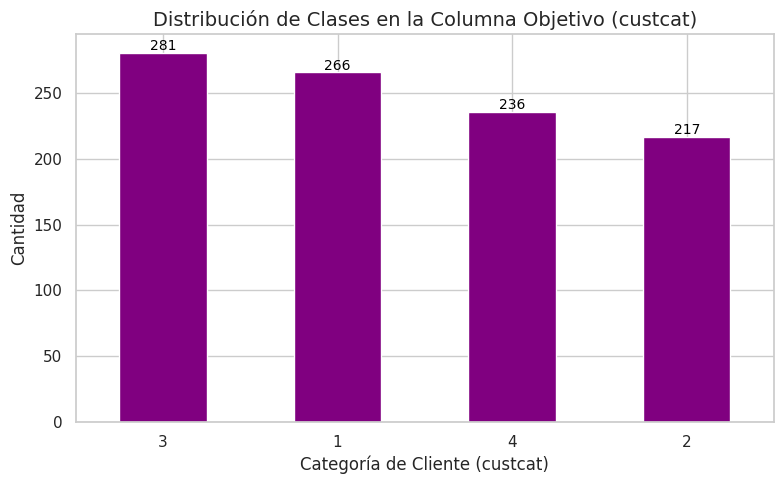

In [94]:
# Distribución de la columna objetivo (custcat)
custcat_distribution = df['custcat'].value_counts()

# Visualización de la distribución de la columna objetivo
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8, 5))
custcat_distribution.plot(kind='bar', color='purple', ax=ax)
ax.set_title('Distribución de Clases en la Columna Objetivo (custcat)', fontsize=14)
ax.set_xlabel('Categoría de Cliente (custcat)', fontsize=12)
ax.set_ylabel('Cantidad', fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout()

# Añadir etiquetas con los valores sobre cada barra
for bar in ax.patches:
    # Obtener la altura de cada barra
    value = bar.get_height()
    # Añadir texto sobre la barra
    ax.text(bar.get_x() + bar.get_width() / 2, value + 2, str(value),
            ha='center', fontsize=10, color='black')

plt.show()




En el gràfico de barras anterior se puede observar que la categoría 2 tiene menos clientes en comparación con las demás, con un valor cercano a 200.En cuanto al balance de clases no son exactamente iguales, pero estan razonablemente balanceadas.

**Matriz de correlaciòn**

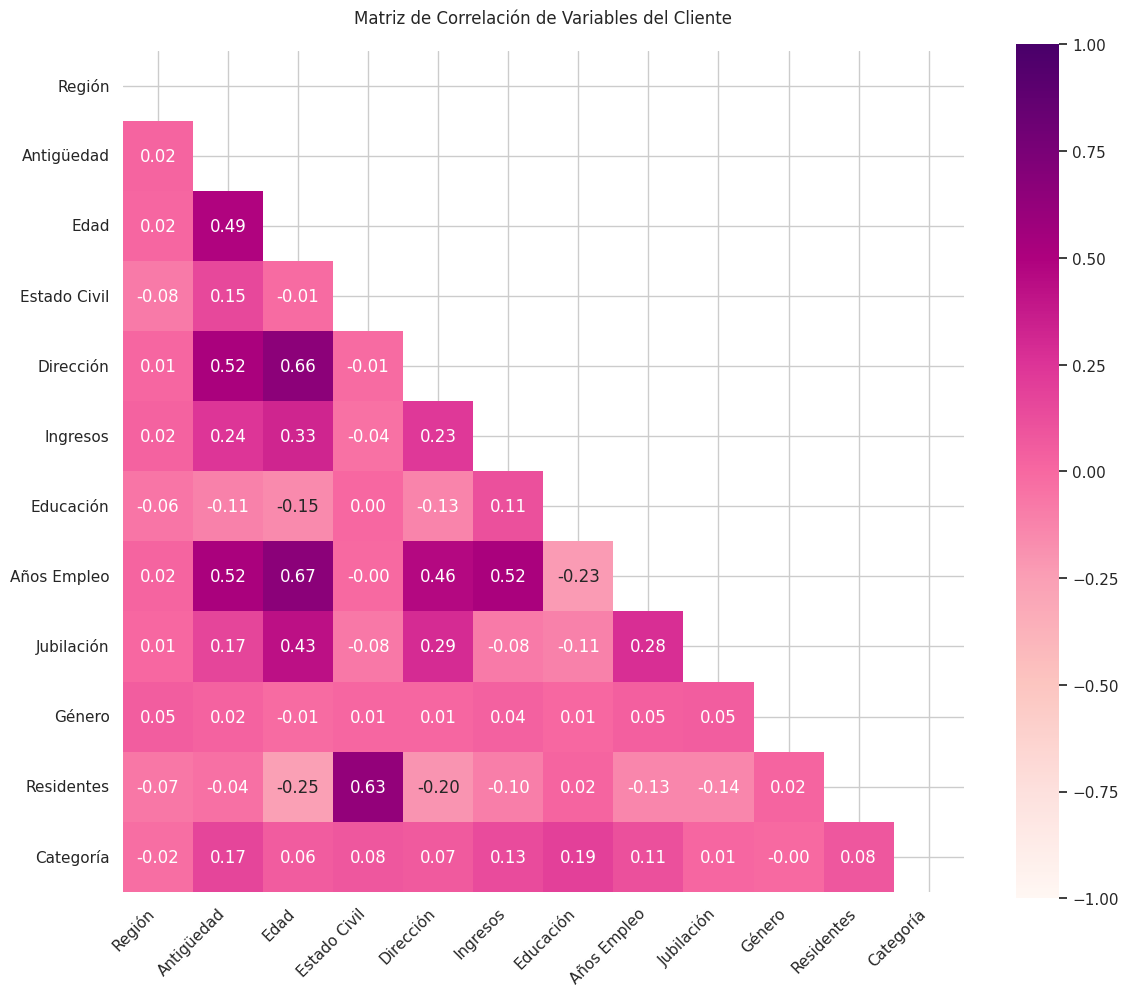


Correlaciones más significativas (|corr| > 0.3):
Antigüedad - Edad: 0.490
Antigüedad - Dirección: 0.523
Antigüedad - Años Empleo: 0.520
Edad - Antigüedad: 0.490
Edad - Dirección: 0.660
Edad - Ingresos: 0.328
Edad - Años Empleo: 0.670
Edad - Jubilación: 0.429
Estado Civil - Residentes: 0.626
Dirección - Antigüedad: 0.523
Dirección - Edad: 0.660
Dirección - Años Empleo: 0.463
Ingresos - Edad: 0.328
Ingresos - Años Empleo: 0.516
Años Empleo - Antigüedad: 0.520
Años Empleo - Edad: 0.670
Años Empleo - Dirección: 0.463
Años Empleo - Ingresos: 0.516
Jubilación - Edad: 0.429
Residentes - Estado Civil: 0.626


In [95]:
# Variables y sus nombres en español
variables = {
    'region': 'Región', 'tenure': 'Antigüedad', 'age': 'Edad',
    'marital': 'Estado Civil', 'address': 'Dirección', 'income': 'Ingresos',
    'ed': 'Educación', 'employ': 'Años Empleo', 'retire': 'Jubilación',
    'gender': 'Género', 'reside': 'Residentes', 'custcat': 'Categoría'
}

# Crear y mostrar heatmap
plt.figure(figsize=(12, 10))
mask = np.triu(np.ones_like(df[variables.keys()].corr()))
sns.heatmap(df[variables.keys()].corr(), mask=mask, annot=True, fmt='.2f',
            cmap='RdPu', center=0, vmin=-1, vmax=1, square=True,
            xticklabels=[variables[v] for v in variables.keys()],
            yticklabels=[variables[v] for v in variables.keys()])

plt.title('Matriz de Correlación de Variables del Cliente', pad=20)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Mostrar correlaciones significativas
print("\nCorrelaciones más significativas (|corr| > 0.3):")
corr_matrix = df[variables.keys()].corr()
for i in variables.keys():
    for j in variables.keys():
        if abs(corr_matrix.loc[i,j]) > 0.3 and i != j:
            print(f"{variables[i]} - {variables[j]}: {corr_matrix.loc[i,j]:.3f}")

**Correlaciones relacionadas con la Edad:**


Edad - Años Empleo (0.670): La correlación más fuerte. Natural, ya que a mayor edad, más años de experiencia laboral
Edad - Dirección (0.660): Sugiere que personas mayores tienden a tener direcciones más estables/permanentes
Edad - Antigüedad (0.490): Clientes mayores tienden a tener más tiempo con la empresa
Edad - Jubilación (0.429): Correlación positiva lógica, a mayor edad más probabilidad de jubilación
Edad - Ingresos (0.328): Correlación moderada que sugiere que los ingresos aumentan con la edad


**Correlaciones relacionadas con Antigüedad:**


Antigüedad - Dirección (0.523): Clientes con más tiempo en la empresa tienden a tener direcciones más estables
Antigüedad - Años Empleo (0.520): Mayor estabilidad laboral se relaciona con mayor tiempo como cliente
Antigüedad - Edad (0.490): Clientes más antiguos tienden a ser de mayor edad


**Correlaciones relacionadas con Años de Empleo:**

Años Empleo - Ingresos (0.516): Mayor experiencia laboral se relaciona con mayores ingresos
Años Empleo - Antigüedad (0.520): Más años trabajando se relaciona con más tiempo como cliente
Años Empleo - Dirección (0.463): Estabilidad laboral se relaciona con estabilidad residencial


**Correlaciones relacionadas con Estado Civil y Residentes:**


Estado Civil - Residentes (0.626): Fuerte correlación que indica que las personas casadas tienden a tener más residentes en el hogar.



# **3.Preprocesamiento**

In [96]:
#visualizar el tipo de variables para definir el metodo de estandarizaciòn
#Verificar tipos de datos
print("Tipos de datos por columna:")
print(df.dtypes)


#Ver valores únicos por columna
print("\nValores únicos por columna:")
for columna in df.columns:
    n_unique = df[columna].nunique()
    print(f"{columna}: {n_unique} valores únicos")
    if n_unique < 10:  # Mostrar valores si son pocos
        print(f"Valores: {sorted(df[columna].unique())}\n")

# Método 4: Resumen estadístico básico
print("\nResumen estadístico de variables numéricas:")
print(df.describe())

# Identificar explícitamente variables categóricas
categorical_vars = df.select_dtypes(include=['object', 'category']).columns
numerical_vars = df.select_dtypes(include=['int64', 'float64']).columns

print("Variables numéricas:", list(numerical_vars))

Tipos de datos por columna:
region       int64
tenure       int64
age          int64
marital      int64
address      int64
income     float64
ed           int64
employ       int64
retire     float64
gender       int64
reside       int64
custcat      int64
dtype: object

Valores únicos por columna:
region: 3 valores únicos
Valores: [1, 2, 3]

tenure: 72 valores únicos
age: 60 valores únicos
marital: 2 valores únicos
Valores: [0, 1]

address: 50 valores únicos
income: 218 valores únicos
ed: 5 valores únicos
Valores: [1, 2, 3, 4, 5]

employ: 46 valores únicos
retire: 2 valores únicos
Valores: [0.0, 1.0]

gender: 2 valores únicos
Valores: [0, 1]

reside: 8 valores únicos
Valores: [1, 2, 3, 4, 5, 6, 7, 8]

custcat: 4 valores únicos
Valores: [1, 2, 3, 4]


Resumen estadístico de variables numéricas:
          region       tenure          age      marital      address  \
count  1000.0000  1000.000000  1000.000000  1000.000000  1000.000000   
mean      2.0220    35.526000    41.684000     0.49

In [97]:
#pasar datos flotantes a enteros
df['retire'] = df['retire'].astype(int)
df['income'] = df['income'].astype(int)
df.dtypes

,0
region,int64
tenure,int64
age,int64
marital,int64
address,int64
income,int64
ed,int64
employ,int64
retire,int64
gender,int64


**Variables categóricas:**

*   custcat (Categoría de cliente 1-4)
*   gender (Género: 0/1)
*   retire (Jubilación: 0/1)
*   marital (Estado civil: 0/1)
*   region (Región: 1/2/3)
*   ed (Nivel educativo: 1-5)


**Variables numéricas continuas:**

*   income (Ingresos)
*   age (Edad)
*   employ (Años de empleo)
*   tenure (Antigüedad)
*   address (Años en la dirección)
*   reside (Número de residentes)

**Guardar el dataframe con datos numericos**

In [98]:
# Guardar el DataFrame resultante en un archivo CSV
df.to_csv('dato_numericos.csv', index=False)

# Confirmación
print("CSV guardado correctamente")

CSV guardado correctamente


In [99]:
#importar el preprocesador
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Crear una copia del DataFrame original
df_transformed = df.copy()



In [103]:
#Normalización de variables numéricas continuas
scaler = StandardScaler()
numeric_vars = df_transformed.select_dtypes(include=['int64']).columns
df_transformed[numeric_vars] = scaler.fit_transform(df_transformed[numeric_vars])


In [104]:
df_transformed.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,-0.026968,-1.055125,0.184505,1.010051,-0.253034,-0.126506,1.087753,-0.594123,-0.222076,-1.034598,-0.230650,-1.327980
1,1.198836,-1.148806,-0.691812,1.010051,-0.451415,0.546450,1.906227,-0.594123,-0.222076,-1.034598,2.556662,1.351199
2,1.198836,1.521092,0.821826,1.010051,1.234819,0.359517,-1.367671,1.787528,-0.222076,0.966559,-0.230650,0.458140
3,-0.026968,-0.118319,-0.691812,-0.990050,0.044536,-0.416251,-0.549196,-1.090300,-0.222076,0.966559,-0.927478,-1.327980
4,-0.026968,-0.586722,-0.930808,1.010051,-0.253034,-0.444291,-1.367671,-0.891829,-0.222076,-1.034598,1.163006,0.458140


# **Guardar a CSV**

In [105]:



# Guardar el DataFrame resultante en un archivo CSV
df_transformed.to_csv('datos_estandarizados.csv', index=False)

# Confirmación
print("CSV guardado correctamente")

CSV guardado correctamente
